In [1]:
import pandas as pd
import numpy as np
import sklearn

# IMPORTO DATAFRAME UNICAMENTE CON LAS FILAS CLASIFICADAS

In [2]:
df_me_data0=pd.read_csv('me_diet_data.csv')

In [3]:
df_me_data0

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,0,mixed salads,celeriac in remoulade sauce prepacked,0.00,78.50,1.12,4.19,12.80,2.38,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,1,mixed salads,prepared mixed tuna and vegetable salad canne...,0.00,76.50,9.15,7.74,4.70,3.08,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,2,mixed salads,prepared mixed meat/fish canned drained salad,0.00,76.70,8.06,6.40,5.30,1.90,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,3,mixed salads,greek style marinated mushrooms,0.00,84.60,2.08,3.95,3.55,2.38,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,4,mixed salads,prepared potatoes salad home made,0.00,76.00,2.68,9.90,8.20,0.00,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,5,mixed salads,tabbouleh prepacked,0.00,66.40,4.29,22.20,5.65,3.82,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,6,mixed salads,potato salad piémontaise style prepacked,0.00,74.90,4.11,7.98,9.28,1.17,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,7,mixed salads,prepared rice salad,0.00,72.50,5.13,16.10,4.35,1.00,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,8,mixed salads,prepared pasta salad vegetarian,0.00,73.90,5.70,12.90,8.10,2.30,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,9,mixed salads,salad vegetable without dressing (average),22.30,93.70,1.03,2.50,0.53,2.01,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


In [4]:
df_me_data=df_me_data0.drop(columns=['Unnamed: 0', 'Name'])

In [5]:
display(df_me_data)

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,mixed salads,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.0,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,mixed salads,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.0,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,mixed salads,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.0,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,mixed salads,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.0,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,mixed salads,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.0,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,mixed salads,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.0,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,mixed salads,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.0,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,mixed salads,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.0,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,mixed salads,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.0,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,mixed salads,22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.0,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


In [6]:
df_me_data['ME_CLASSIFIED'].value_counts()

GOOD        2171
BAD          800
NEUTRALS     168
Name: ME_CLASSIFIED, dtype: int64

In [7]:
from sklearn import preprocessing
labels= df_me_data['Group']

In [8]:
encoder=preprocessing.LabelEncoder()
df_me_data['Group']=encoder.fit_transform(labels)


In [9]:
numeric_dict={'GOOD':1,'NEUTRALS':0,'BAD':-1}
df_me_data['ME_CLASSIFIED']=df_me_data['ME_CLASSIFIED'].map(numeric_dict)

In [10]:
df_me_data

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,51,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.0,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,1
1,51,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.0,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,1
2,51,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.0,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,1
3,51,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.0,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,1
4,51,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.0,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,1
5,51,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.0,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,-1
6,51,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.0,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,1
7,51,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.0,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,1
8,51,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.0,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,-1
9,51,22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.0,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,1


# DIVIDIENDO LOS DATOS PARA EL SUPERVISADO

In [11]:
X=df_me_data[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]
y=df_me_data['ME_CLASSIFIED']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_train.value_counts()

 1    1738
-1     635
 0     138
Name: ME_CLASSIFIED, dtype: int64

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [15]:
from sklearn.model_selection import RandomizedSearchCV


In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

# RANDOM FOREST CLASSIFIER

In [17]:
randomforest = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
y_pred=randomforest.predict(X_test)

In [19]:
randomforest.score(X_test, y_test)

0.89171974522293

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.8568603067448333

In [21]:
df_no_clas0=pd.read_csv('me_diet_EMPTY.csv')

In [22]:
df_no_clas0.head()

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,12,mixed salads,coleslaw w sauce prepacked,105.0,80.4,0.94,5.78,8.10,4.72,0.0,...,0.093,14.6,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,18,soup,soup leek and potato prepacked to be reheated,37.1,90.8,0.79,4.46,1.51,0.81,0.0,...,0.230,29.3,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,23,soup,soup chorba frik w meat and frik,62.9,85.1,3.75,5.40,2.50,0.90,0.0,...,0.070,16.0,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,26,soup,soup asian style with noodles dehydrated and...,29.8,93.3,0.97,5.25,0.44,1.21,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,27,soup,soup moroccan dehydrated and reconstituted,34.3,90.0,1.20,5.77,0.55,1.49,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [23]:
df_no_clas=df_no_clas0.drop(columns=['Unnamed: 0', 'Name'])

In [24]:
df_no_clas

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,mixed salads,105.0,80.40,0.94,5.78,8.10,4.72,0.0,0.00,0.00,...,0.093,14.60,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,soup,37.1,90.80,0.79,4.46,1.51,0.81,0.0,0.00,0.00,...,0.230,29.30,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,soup,62.9,85.10,3.75,5.40,2.50,0.90,0.0,0.00,0.00,...,0.070,16.00,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,soup,29.8,93.30,0.97,5.25,0.44,1.21,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,soup,34.3,90.00,1.20,5.77,0.55,1.49,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
5,soup,26.1,92.80,0.63,4.84,0.41,0.91,0.0,0.00,0.00,...,0.000,0.00,0.000,30.00,0.0,0.0,0.00,0.00,0.00,0.0
6,soup,22.3,0.00,0.70,3.40,0.50,0.50,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
7,soup,32.8,91.10,0.65,3.38,1.62,2.32,0.0,0.00,0.00,...,0.041,5.00,0.000,1.98,0.0,0.0,0.25,1.31,52.60,0.0
8,soup,37.3,90.80,1.22,4.51,1.37,1.62,0.0,0.00,0.00,...,0.110,15.90,0.220,5.19,0.0,0.0,0.00,0.48,6.87,0.0
9,dishes,145.0,0.00,9.55,10.20,7.30,0.00,0.0,0.00,0.00,...,0.000,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [25]:

labels= df_no_clas['Group']

In [26]:
encoder=preprocessing.LabelEncoder()
df_no_clas['Group']=encoder.fit_transform(labels)

In [27]:
df_no_clas.head()

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B6,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2
0,53,105.0,80.4,0.94,5.78,8.10,4.72,0.0,0.0,0.0,...,0.093,14.6,0.000,21.60,0.0,0.0,0.25,2.21,23.00,0.0
1,71,37.1,90.8,0.79,4.46,1.51,0.81,0.0,0.0,0.0,...,0.230,29.3,0.045,7.95,0.0,0.0,0.00,0.28,9.13,0.0
2,71,62.9,85.1,3.75,5.40,2.50,0.90,0.0,0.0,0.0,...,0.070,16.0,0.110,3.20,0.0,0.0,0.02,0.60,0.00,0.0
3,71,29.8,93.3,0.97,5.25,0.44,1.21,0.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0
4,71,34.3,90.0,1.20,5.77,0.55,1.49,0.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [28]:
prediccion=randomforest.predict(df_no_clas)

In [29]:
df_prediccion=pd.DataFrame(prediccion)
df_prediccion

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [30]:
df_no_clas0['ME_CLASSIFIED']=prediccion

In [31]:
df_no_clas0[50:100]

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
50,251,savoury pastries and other starters,samosas or samoosas,237.0,55.2,9.33,18.10,13.70,2.670,0.0,...,20.00,0.34,0.70,0.0,0.0,0.50,1.450,0.00,0.0,1
51,253,savoury pastries and other starters,chinese specialty or dumplings,141.0,64.6,5.90,26.00,1.40,3.900,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
52,254,savoury pastries and other starters,snails in puff pastry,321.0,0.0,6.69,23.10,22.10,1.090,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
53,256,savoury pastries and other starters,meat in puff pastry,354.0,37.1,9.59,27.30,22.60,1.230,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
54,258,savoury pastries and other starters,croissant filled with ham,246.0,54.0,7.90,20.10,14.60,2.600,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.00,0.0,-1
55,259,savoury pastries and other starters,spring roll,109.0,73.9,4.57,18.00,1.82,3.600,0.0,...,16.00,0.16,1.50,0.0,0.0,0.00,0.180,0.00,0.0,-1
56,260,savoury pastries and other starters,egg roll or nem,224.0,54.8,6.48,23.10,11.20,3.020,0.0,...,23.10,0.22,0.50,0.0,0.0,0.50,0.820,0.00,0.0,1
57,266,savoury pastries and other starters,puff pastry savoury (average),307.0,42.9,7.53,28.60,17.70,2.650,0.0,...,7.24,0.52,0.34,0.0,0.0,1.18,1.490,0.00,0.0,-1
58,267,savoury pastries and other starters,vol au vent filled (average),217.0,59.6,7.13,17.10,13.00,2.540,0.0,...,10.20,1.06,0.53,0.0,0.0,0.62,1.210,0.00,0.0,1
59,269,savoury pastries and other starters,egg roll or nem with pork cooked,237.0,53.6,6.88,22.60,12.70,1.900,0.0,...,32.30,0.18,0.50,0.0,0.0,0.25,2.330,1.58,0.0,1


In [32]:
frames = [df_me_data0, df_no_clas0]

result = pd.concat(frames)

In [33]:
category_dict={1:'GOOD',0:'NEUTRALS',-1:'BAD', 'GOOD':'GOOD', 'BAD':'BAD', 'NEUTRALS':'NEUTRALS'}
result['ME_CLASSIFIED']=result['ME_CLASSIFIED'].map(category_dict)

In [34]:
result=result.reset_index()

In [35]:
result.columns

Index(['index', 'Unnamed: 0', 'Group', 'Name', 'Calories', 'Water', 'Protein',
       'Carbohydrates', 'Fat', 'Sugar', 'Sucrose', 'Glucose', 'Fructose',
       'Lactose', 'Maletose', 'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol',
       'Organic_Acids', 'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA',
       'Cholesterol', 'Salt', 'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine',
       'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Sodium', 'Zinc', 'Retinol', 'Alpha_Carotene', 'Beta_Carotene',
       'Caffeine', 'Theobromine', 'Galactose', 'Fluoride',
       'Beta_Cryptoxanthin', 'Lycopene', 'Lutein&Zeaxathin', 'Vitamin A',
       'Vitamin_B1', 'Vitamin_B2', 'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6',
       'Vitamin_B9', 'Vitamin_B12', 'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3',
       'Vitamin_D', 'Vitamin_E', 'Vitamin_K1', 'Vitamin_K2', 'ME_CLASSIFIED'],
      dtype='object')

In [36]:
result=result.drop(columns=['Unnamed: 0', 'index'])

# DATA TOTALMENTE LIMPIOS Y CLASIFICADOS

In [37]:
result

,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,mixed salads,celeriac in remoulade sauce prepacked,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.00,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,mixed salads,prepared mixed tuna and vegetable salad canne...,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.00,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,mixed salads,prepared mixed meat/fish canned drained salad,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.00,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,mixed salads,greek style marinated mushrooms,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.00,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,mixed salads,prepared potatoes salad home made,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.00,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,mixed salads,tabbouleh prepacked,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.00,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,mixed salads,potato salad piémontaise style prepacked,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.00,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,mixed salads,prepared rice salad,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.00,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,mixed salads,prepared pasta salad vegetarian,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.00,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,mixed salads,salad vegetable without dressing (average),22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.00,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


# ALGORITMO DE CONSULTA AL RESULTADO

In [ ]:
import textdistance
    
def consulta(kw):
    metric = textdistance.cosine.distance
    scores = enumerate(map(lambda x :metric(kw,x), lst)) 
    scores = sorted(scores, key=lambda x:x[1]) 
    index, score = scores[0] 
    return 'Select one of this dishes:', list(map(lambda x: (lst[x[0]], x[1]), scores))[:10]

def filtro(kw):    
    lst = result['Name']
    for i in lst:
        if kw in i:
            return consulta(kw)
        else: return '{} is not in our database, please ask for other food'.format(kw)

    
filtro("sugar")

In [ ]:
def generateScores(kw, lst):
    score=textdistance.cosine(kw, lst)
    return score
    

In [157]:
lst = result['Name'] 

In [168]:
for i in lst:
    if "sugar" in i:
        print(i)

rhubarb  stalk  cooked  with sugar
fruits compote  miscellaneous  reduced sugar
fruits compote  miscellaneous  reduced sugar  refrigerated
fruits dessert  all types (fruits dessert's sugar content is less than fruits compote but more than fruits compote reduced sugar)
fruits puree  without sugar added
chou pastry  sugar coated
muesli  flakes (bircher style)  with fruits or dried fruits  without sugar
breakfast biscuit (cookie)  reduced sugar
soft cake  filled with fruit paste or fruit puree and sugar icing coated
biscuit (cookie)  reduced sugar
apple pie with custard (flour  eggs  cream  sugar  apple alcohol)
crepe filled with sugar  prepacked
soft waffle (brussels style)  plain or with sugar  prepacked
wafer biscuit  crunchy (thin or dry)  plain or with sugar  prepacked
condensed milk  without sugar  whole
dairy drink or fermented milk or yogurt  flavoured  with sugar
dairy drink or fermented milk or yogurt  with fruits  with sugar
dairy drink or fermented milk or yogurt  plain  with 

# PROBANDO Neural Network Classifier

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [40]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
y_pred=clf.predict(X_test)

In [42]:
clf.score(X_train, y_train)

0.6921545201115094

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5

# PROBANDO Linear SVC

In [44]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(random_state=20, tol=1e-5)

In [45]:
linearsvc.fit(X_train, y_train)

/Users/claraFDEZ/miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=1e-05,
          verbose=0)

In [46]:
y_pred=linearsvc.predict(X_test)

In [47]:
linearsvc.score(X_train, y_train)

0.4161688570290721

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.6050038491147036

# INTENTANDO SEMI SUPERVISADO

In [49]:
DIET_TO_PREDICT=pd.read_csv('me_diet_TO_PREDICT.csv')

In [50]:
DIET_TO_PREDICT

,Unnamed: 0,Group,Name,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,0,mixed salads,celeriac in remoulade sauce prepacked,0.00,78.50,1.12,4.19,12.80,2.38,0.0,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,GOOD
1,1,mixed salads,prepared mixed tuna and vegetable salad canne...,0.00,76.50,9.15,7.74,4.70,3.08,0.0,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,GOOD
2,2,mixed salads,prepared mixed meat/fish canned drained salad,0.00,76.70,8.06,6.40,5.30,1.90,0.0,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,GOOD
3,3,mixed salads,greek style marinated mushrooms,0.00,84.60,2.08,3.95,3.55,2.38,0.0,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,GOOD
4,4,mixed salads,prepared potatoes salad home made,0.00,76.00,2.68,9.90,8.20,0.00,0.0,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,GOOD
5,5,mixed salads,tabbouleh prepacked,0.00,66.40,4.29,22.20,5.65,3.82,0.0,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,BAD
6,6,mixed salads,potato salad piémontaise style prepacked,0.00,74.90,4.11,7.98,9.28,1.17,0.0,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,GOOD
7,7,mixed salads,prepared rice salad,0.00,72.50,5.13,16.10,4.35,1.00,0.0,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,GOOD
8,8,mixed salads,prepared pasta salad vegetarian,0.00,73.90,5.70,12.90,8.10,2.30,0.0,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,BAD
9,9,mixed salads,salad vegetable without dressing (average),22.30,93.70,1.03,2.50,0.53,2.01,0.0,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,GOOD


In [51]:
DIET_TO_PREDICT.drop(columns=['Unnamed: 0', 'Name'], inplace=True)

In [52]:
from sklearn import preprocessing
labels= DIET_TO_PREDICT['Group']

In [53]:
encoder=preprocessing.LabelEncoder()
DIET_TO_PREDICT['Group']=encoder.fit_transform(labels)

In [54]:
numeric_dict={'GOOD':2,'NEUTRALS':1,'BAD':0}
DIET_TO_PREDICT['ME_CLASSIFIED']=DIET_TO_PREDICT['ME_CLASSIFIED'].map(numeric_dict)

In [55]:
DIET_TO_PREDICT.columns

Index(['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2', 'ME_CLASSIFIED'],
      dtype='object')

In [56]:
DIET_TO_PREDICT1=DIET_TO_PREDICT[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]
DIET_CLASSIFICATION=DIET_TO_PREDICT['ME_CLASSIFIED']

# UMAP

In [57]:
from umap import UMAP

In [58]:
def get_umap(dataset, n_components):
 
    umap = UMAP(n_components=n_components, random_state=42)
    embedding = umap.fit_transform(dataset)

    return pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(n_components)])
    

In [59]:
umap_df = get_umap(DIET_TO_PREDICT1, 2)
umap_df.head()

/Users/claraFDEZ/miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/claraFDEZ/miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/umap/rp_tree.py (457)

File "../../../miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving

,emb_1,emb_2
0,-9.154629,-5.838719
1,-9.321013,-5.985912
2,-8.111339,-5.528968
3,6.285210,6.639366
4,0.280093,-0.702307


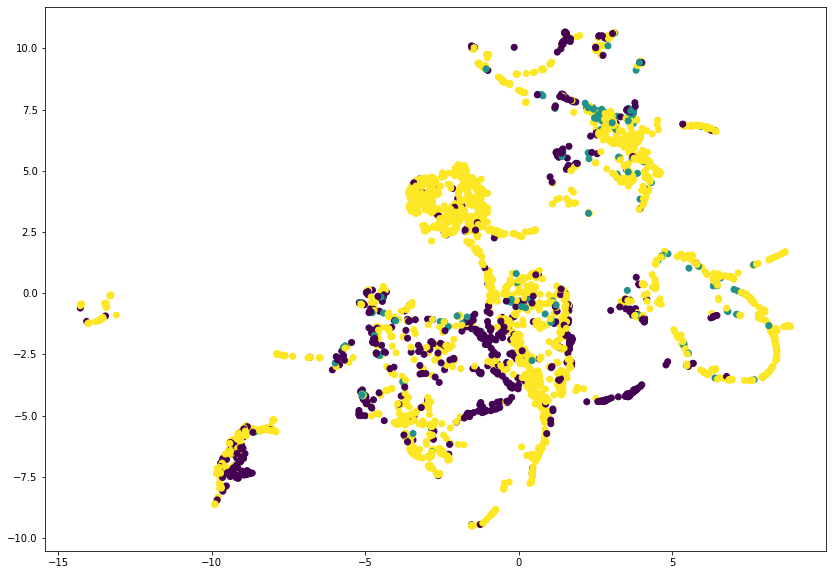

In [60]:

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'],c=DIET_CLASSIFICATION, alpha=1.0)

#plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [61]:
umap_df['to_predict']=DIET_CLASSIFICATION

In [62]:
umap_df1=umap_df[umap_df['to_predict'].notnull()]

In [63]:
umap_df1

,emb_1,emb_2,to_predict
0,-9.154629,-5.838719,2.0
1,-9.321013,-5.985912,2.0
2,-8.111339,-5.528968,2.0
3,6.285210,6.639366,2.0
4,0.280093,-0.702307,2.0
5,0.382690,-0.281179,0.0
6,0.490931,-0.420234,2.0
7,0.531301,-0.483082,2.0
8,6.394084,6.639412,0.0
9,-1.546468,-9.508636,2.0


# KMEANS AFTER UMAP

In [64]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(umap_df1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
DIET_TO_PREDICT.dtypes

Group                   int64
Calories              float64
Water                 float64
Protein               float64
Carbohydrates         float64
Fat                   float64
Sugar                 float64
Sucrose               float64
Glucose               float64
Fructose              float64
Lactose               float64
Maletose              float64
Starch                float64
Fiber                 float64
Polyols               float64
Ash                   float64
Alcohol               float64
Organic_Acids         float64
Saturated_Fat         float64
Fat_Mono.             float64
Fat_Poly.             float64
DHA                   float64
Cholesterol           float64
Salt                  float64
Calcium               float64
Choline               float64
Cupper                float64
Iron                  float64
Iodine                float64
Magnesium             float64
                       ...   
Potassium             float64
Selenium              float64
Sodium    

In [66]:
DIET_TO_PREDICT['ME_CLASSIFIED']=pd.to_numeric(DIET_TO_PREDICT['ME_CLASSIFIED'])

In [67]:
X=DIET_TO_PREDICT[['Group', 'Calories', 'Water', 'Protein', 'Carbohydrates', 'Fat',
       'Sugar', 'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maletose',
       'Starch', 'Fiber', 'Polyols', 'Ash', 'Alcohol', 'Organic_Acids',
       'Saturated_Fat', 'Fat_Mono.', 'Fat_Poly.', 'DHA', 'Cholesterol', 'Salt',
       'Calcium', 'Choline', 'Cupper', 'Iron', 'Iodine', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Zinc',
       'Retinol', 'Alpha_Carotene', 'Beta_Carotene', 'Caffeine', 'Theobromine',
       'Galactose', 'Fluoride', 'Beta_Cryptoxanthin', 'Lycopene',
       'Lutein&Zeaxathin', 'Vitamin A', 'Vitamin_B1', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_B9', 'Vitamin_B12',
       'Vitamin_C', 'Vitamin_D2', 'Vitamin_D3', 'Vitamin_D', 'Vitamin_E',
       'Vitamin_K1', 'Vitamin_K2']]

y=DIET_TO_PREDICT['ME_CLASSIFIED']
 

In [68]:
masked_target = DIET_TO_PREDICT['ME_CLASSIFIED'].fillna(-1)
masked_target

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
5       0.0
6       2.0
7       2.0
8       0.0
9       2.0
10      0.0
11      2.0
12     -1.0
13      0.0
14      1.0
15      2.0
16      2.0
17      2.0
18     -1.0
19      2.0
20      2.0
21      2.0
22      2.0
23     -1.0
24      2.0
25      2.0
26     -1.0
27     -1.0
28     -1.0
29      2.0
       ... 
6199   -1.0
6200   -1.0
6201   -1.0
6202   -1.0
6203   -1.0
6204    1.0
6205    2.0
6206    1.0
6207   -1.0
6208   -1.0
6209   -1.0
6210    0.0
6211   -1.0
6212    0.0
6213   -1.0
6214   -1.0
6215   -1.0
6216    0.0
6217    2.0
6218   -1.0
6219   -1.0
6220    0.0
6221   -1.0
6222   -1.0
6223   -1.0
6224    0.0
6225    2.0
6226   -1.0
6227   -1.0
6228   -1.0
Name: ME_CLASSIFIED, Length: 6229, dtype: float64

In [69]:
masked_target.value_counts()

-1.0    3090
 2.0    2171
 0.0     800
 1.0     168
Name: ME_CLASSIFIED, dtype: int64

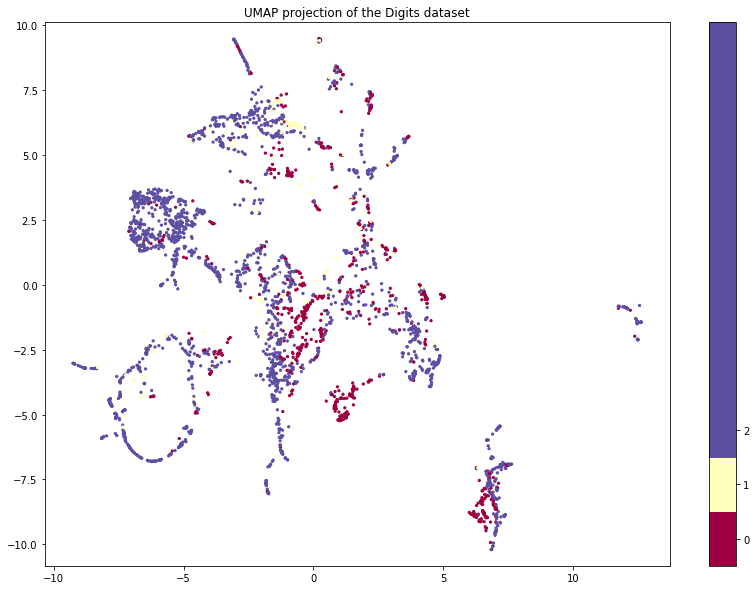

In [70]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP().fit_transform(X, y=masked_target)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the Digits dataset', fontsize=12);

In [71]:
embedding

array([[ 6.991497 , -7.5840783],
       [ 7.0585527, -7.7914295],
       [ 7.479367 , -6.9359083],
       ...,
       [-1.4724077, -2.1147544],
       [ 1.5050169,  3.183803 ],
       [-6.7221556,  2.984413 ]], dtype=float32)

In [72]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(umap_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
kmeans.cluster_centers_

array([[-1.65008947,  4.80904146],
       [ 4.79016176, -3.52996078],
       [-3.27155312, -2.19026953]])

In [74]:
DIET_TO_PREDICT['ME_CLASSIFIED']=kmeans.predict(umap_df)

In [75]:
DIET_TO_PREDICT

,Group,Calories,Water,Protein,Carbohydrates,Fat,Sugar,Sucrose,Glucose,Fructose,...,Vitamin_B9,Vitamin_B12,Vitamin_C,Vitamin_D2,Vitamin_D3,Vitamin_D,Vitamin_E,Vitamin_K1,Vitamin_K2,ME_CLASSIFIED
0,56,0.00,78.50,1.12,4.19,12.80,2.38,0.0,0.00,0.00,...,28.00,0.080,25.20,0.0,0.0,0.500,3.40,0.00,0.0,1
1,56,0.00,76.50,9.15,7.74,4.70,3.08,0.0,0.00,0.00,...,31.00,1.450,2.75,0.0,0.0,0.500,1.60,0.00,0.0,1
2,56,0.00,76.70,8.06,6.40,5.30,1.90,0.0,0.00,0.00,...,11.10,1.230,0.00,0.0,0.0,0.440,2.04,9.75,0.0,1
3,56,0.00,84.60,2.08,3.95,3.55,2.38,0.0,0.00,0.00,...,27.30,0.018,10.30,0.0,0.0,0.000,1.47,0.00,0.0,0
4,56,0.00,76.00,2.68,9.90,8.20,0.00,0.0,0.00,0.00,...,7.00,0.000,10.00,0.0,0.0,0.000,0.00,0.00,0.0,2
5,56,0.00,66.40,4.29,22.20,5.65,3.82,0.0,0.00,0.00,...,17.00,0.000,14.50,0.0,0.0,0.000,1.68,0.00,0.0,2
6,56,0.00,74.90,4.11,7.98,9.28,1.17,0.0,0.00,0.00,...,0.00,0.000,7.62,0.0,0.0,0.500,2.07,0.00,0.0,2
7,56,0.00,72.50,5.13,16.10,4.35,1.00,0.0,0.00,0.00,...,33.50,0.430,4.48,0.0,0.0,0.500,1.63,0.00,0.0,2
8,56,0.00,73.90,5.70,12.90,8.10,2.30,0.0,0.00,0.00,...,16.00,0.000,21.00,0.0,0.0,0.000,1.95,0.00,0.0,0
9,56,22.30,93.70,1.03,2.50,0.53,2.01,0.0,0.00,0.00,...,39.30,0.000,14.60,0.0,0.0,0.074,0.47,45.30,0.0,0


In [76]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN()

/Users/claraFDEZ/miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/claraFDEZ/miniconda3/envs/FINAL_PROJECT_ENV/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


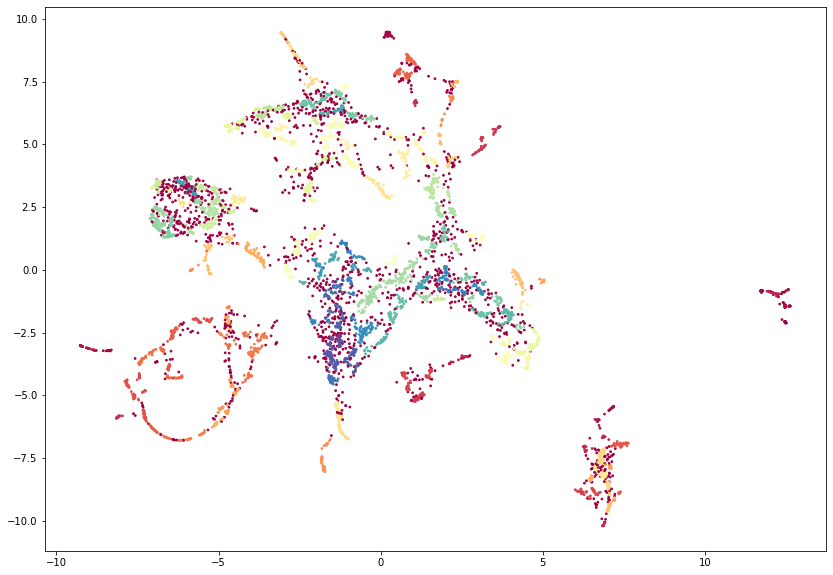

In [77]:
predictions = hdbscan.fit_predict(umap_df)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=predictions, cmap='Spectral', s=3)

In [78]:
len(df_me_data)

3139

In [79]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    embedding = UMAP(random_state=42).fit_transform(X)
    umap_df = pd.DataFrame(embedding, columns=['emb_1', 'emb_2'])


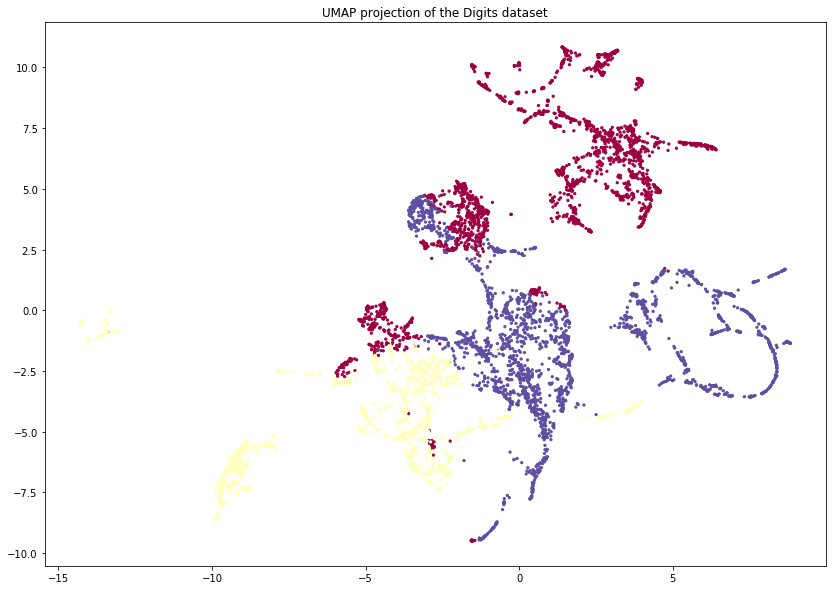

In [80]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.title('UMAP projection of the Digits dataset', fontsize=12);

In [81]:
y.value_counts()

2.0    2171
0.0     800
1.0     168
Name: ME_CLASSIFIED, dtype: int64

In [82]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(umap_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)